# Data Analisis Assignment - Group 1
## Introduction
The goal of this project is to analyze hourly electricity generation in Spain, broken down by autonomous community and generation technology. We aim to extract and explore key insights from the data, identify regional and technological trends, and optionally examine correlations between different data sources.
## Task 1: Data Extraction and Saving
The data extraction process is carried out through the Red El√©ctrica de Espa√±a (REE) API. An interactive user interface allows users to input the desired autonomous community and time period. Based on these inputs, the program retrieves the corresponding hourly electricity generation data and exports it to an Excel file named in the format: "Generation_[AutonomousCommunity][StartDate][EndDate]".

__Inputs:__
- Region Code
- Start Date
- End Date

__Output:__
- Excel file with columns: datetime, value by technology, percentage value by technology

In [1]:
import requests
import json
import pandas as pd
from datetime import datetime as dt

# Geo_id per region according to the REE API:
# https://www.ree.es/es/datos/apidatos
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1. Dictionary REGIONS  ‚Üí  readable key  ‚Üí  API id
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
REGIONES = {
    "Andaluc√≠a": 4,
    "Arag√≥n": 5,
    "Cantabria": 6,
    "Asturias": 11,
    "Castilla y Le√≥n": 8,
    "Castilla-La Mancha": 7,
    "Catalu√±a": 9,
    "Comunidad Valenciana": 15,
    "Extremadura": 16,
    "Galicia": 17,
    "Madrid": 8752,
    "Murcia": 21,
    "Navarra": 14,
    "Pa√≠s Vasco": 10,
    "La Rioja": 20,
    "Islas Baleares": 8743,
    "Islas Canarias": 8742,
    "Ceuta": 8744,
    "Melilla": 8745,
    "Pen√≠nsula": 8741,
}

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2. Interactive selection (region + dates)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë   Available Regions (geo_limit=ccaa)     ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

for n, reg in enumerate(REGIONES, 1):
    print(f"{n:>2}. {reg}")

# --- Select region ---
while True:
    try:
        idx = int(input("\nNumber of desired region: "))
        region_name = list(REGIONES)[idx - 1]
        geo_id = REGIONES[region_name]
        break
    except (ValueError, IndexError):
        print("‚õî Invalid choice, try again‚Ä¶")

# --- Date input ---
def ask_date(prompt):
    while True:
        try:
            txt = input(prompt)
            return dt.strptime(txt.strip(), "%Y-%m-%d %H:%M")
        except ValueError:
            print("‚õî Invalid format. Example: 2019-01-01 00:00")

start = ask_date("\nStart date (YYYY-MM-DD HH:MM): ")
end   = ask_date("End date   (YYYY-MM-DD HH:MM): ")
if end <= start:
    raise ValueError("End date must be after the start date.")

print(f"\n‚ñ∂ Region: {region_name}  (geo_id = {geo_id})")
print(f"‚ñ∂ Period: {start}  ‚Üí  {end}\n")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 3. API call function (daily granularity)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def get_gen(geo_id, start_date, end_date):
    url = "https://apidatos.ree.es/es/datos/generacion/estructura-generacion"

    headers = {
        "Accept": "application/json",
    }

    params = {
        "start_date": start_date,
        "end_date": end_date,
        "time_trunc": "day",
        "geo_limit":  "ccaa",
        "geo_id": geo_id
    }

    response = requests.get(url, headers=headers, params=params)

    if response.status_code != 200:
        print(f"‚õî Error {response.status_code}")
        print(response.text)
        return pd.DataFrame()  # <- Return empty DataFrame on failure

    data = response.json()

    # Extract generation data
    rows = []
    for technology in data["included"]:
        name = technology["attributes"]["title"]
        for v in technology["attributes"]["values"]:
            rows.append({
                "datetime": v["datetime"],
                "value": v["value"],
                "percentage": v["percentage"],
                "technology": name
            })

    return pd.DataFrame(rows)

# Call API
df = get_gen(geo_id, start, end)


if df.empty:
    print("‚ùó No data found. Please verify your input.")
else:
    print(df.head())
    # Format dates to string
    start_str = start.strftime("%Y%m%d")
    end_str   = end.strftime("%Y%m%d")

    # Export to Excel
    archivo_excel = f"generacion_{region_name.replace(' ', '_').lower()}_{start_str}_{end_str}.xlsx"
    df.to_excel(archivo_excel, index=False)
    print(f"‚úÖ Data saved to: {archivo_excel}")

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë   Available Regions (geo_limit=ccaa)     ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
 1. Andaluc√≠a
 2. Arag√≥n
 3. Cantabria
 4. Asturias
 5. Castilla y Le√≥n
 6. Castilla-La Mancha
 7. Catalu√±a
 8. Comunidad Valenciana
 9. Extremadura
10. Galicia
11. Madrid
12. Murcia
13. Navarra
14. Pa√≠s Vasco
15. La Rioja
16. Islas Baleares
17. Islas Canarias
18. Ceuta
19. Melilla
20. Pen√≠nsula

Number of desired region: 2020-01-01 00:00
‚õî Invalid choice, try again‚Ä¶

Number of desired region: 20

Start date (YYYY-MM-DD HH:MM): 2020-01-01 00:00
End date   (YYYY-MM-DD HH:MM): 2020-01-31 00:00

‚ñ∂ Region: Pen√≠nsula  (geo_id = 8741)
‚ñ∂ Period: 2020-01-01 00:00:00  ‚Üí  2020-01-31 00:00:00

                        datetime       value  percentage  technology
0  2020-0

## Task 2: Data Preprocessing and Cleaning

__Inputs:__
- dataframe "df" with columns: datetime, value, percentage, technology

__Output:__
- dataframe 'daily_pivot': Containing the daily production values and percentages of each techonlogy
- dataframe 'monthly_pivot': Containing the monthly production values and percentages of each techonlogy

In [26]:
# Display the top 5 rows of the Dataframe
df.head()

datetime         value  percentage        technology  \
0   2020-01-01 00:00:00+01:00  1.514820e+05    0.006559        Hidr√°ulica   
351 2020-01-01 00:00:00+01:00  8.373805e+03    0.000363  Otras renovables   
479 2020-01-01 00:00:00+01:00  2.309634e+07    1.000000  Generaci√≥n total   
160 2020-01-01 00:00:00+01:00  3.941224e+03    0.000171  Turbina de vapor   
31  2020-01-01 00:00:00+01:00  3.729344e+06    0.161469        Hidr√°ulica   

     day    month        date  
0      1  2020-01  2020-01-01  
351    1  2020-01  2020-01-01  
479    1  2020-01  2020-01-01  
160    1  2020-01  2020-01-01  
31     1  2020-01  2020-01-01

In [3]:
# Display information about the data including the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    510 non-null    object 
 1   value       510 non-null    float64
 2   percentage  510 non-null    float64
 3   technology  510 non-null    object 
dtypes: float64(2), object(2)
memory usage: 16.1+ KB


In [4]:
# Display descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset‚Äôs distribution, excluding NaN values.
df.describe()

value    percentage
count  5.100000e+02  5.100000e+02
mean   1.738151e+05  1.215686e-01
std    1.105520e+06  2.392436e-01
min    1.220000e-01  2.601559e-07
25%    3.927179e+03  4.458084e-03
50%    1.178186e+04  1.577859e-02
75%    1.105605e+05  1.349513e-01
max    2.309634e+07  1.000000e+00

In [5]:
# Check data for missing values
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_cols = missing_values[missing_values > 0]

# Print results
if missing_cols.empty:
    print("No null values found.")
else:
    print("Missing values found in the following columns:")
    print(missing_cols)
    print("\nPossible treatments:")
    print("- Drop rows with missing values: df.dropna(inplace=True)")
    print("- Fill missing values (example: fill with mean): df.fillna(df.mean(), inplace=True)")

No null values found.


In [6]:
# Convert datetime column
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

In [7]:
# Sort by datetime just in case
df = df.sort_values('datetime')

### Dataframe restructure:
The dataframe 'df' now is structured like in the columns:
- datetime
- value
- percentage
- technology

Note that all the first dates of a month contain two values: one for the actual value and percentage of the technology of that date and one for the cummulated value and percentage of the month.

To fix this the dataframe is restructured into two resulting ones. One with the monthly statistics and one with the daily statistics.

In [8]:
# Restructure to get the dataframe for the daily data.
# Output structure: datetime	value_[technology]	percentage_[technology]

# Drop the cumulative rows ‚Äî keep only the first daily entry
daily_df = df.copy()
daily_df['day'] = daily_df['datetime'].dt.date

# For each day and technology, keep only the minimum value (assuming the cumulative has higher value)
daily_df = daily_df.sort_values(['datetime', 'technology', 'value']).drop_duplicates(['day', 'technology'], keep='first')

# Pivot to wide format
daily_pivot = daily_df.pivot(index='datetime', columns='technology', values=['value', 'percentage'])

# Flatten MultiIndex columns
daily_pivot.columns = [f"{col[0]}_{col[1]}" for col in daily_pivot.columns]
daily_pivot = daily_pivot.reset_index()

# Check for the results
daily_pivot.head()

datetime  value_Carb√≥n  value_Ciclo combinado  \
0 2020-01-01 00:00:00+01:00      8634.057             119850.631   
1 2020-01-02 00:00:00+01:00     13528.944             146487.644   
2 2020-01-03 00:00:00+01:00     15005.648             121440.647   
3 2020-01-04 00:00:00+01:00     14957.816              85075.701   
4 2020-01-05 00:00:00+01:00     19109.375              88257.111   

   value_Cogeneraci√≥n  value_E√≥lica  value_Generaci√≥n total  \
0           58759.866     23525.794            2.309634e+07   
1           73625.417     77426.389            6.923962e+05   
2           81302.220     84099.112            6.725393e+05   
3           77322.202    125320.489            6.672864e+05   
4           75671.517     61809.342            6.029830e+05   

   value_Hidroe√≥lica  value_Hidr√°ulica  value_Motores di√©sel  value_Nuclear  \
0             25.172        151481.978              6225.581     170552.654   
1             21.048        159171.675              7044.773     170547.966   
2             21.957        151996.921              7882.421     170574.170   
3             14.807        139873.002              7270.960     170642.767   
4             20.221        126801.179              6657.907     170645.456   

   ...  percentage_Hidr√°ulica  percentage_Motores di√©sel  percentage_Nuclear  \
0  ...               0.006559                   0.000270            0.007384   
1  ...               0.229885                   0.010174            0.246316   
2  ...               0.226005                   0.011720            0.253627   
3  ...               0.209615                   0.010896            0.255726   
4  ...               0.210290                   0.011042            0.283002   

   percentage_Otras renovables  percentage_Residuos no renovables  \
0                     0.000363                           0.000182   
1                     0.012143                           0.005550   
2                     0.013371                           0.006695   
3                     0.014311                           0.007429   
4                     0.016634                           0.008054   

   percentage_Residuos renovables  percentage_Solar fotovoltaica  \
0                        0.000106                       0.000981   
1                        0.003055                       0.027411   
2                        0.003146                       0.025810   
3                        0.003329                       0.032608   
4                        0.003727                       0.044074   

   percentage_Solar t√©rmica  percentage_Turbina de gas  \
0                  0.000230                   0.000037   
1                  0.005665                   0.002889   
2                  0.001073                   0.002176   
3                  0.004673                   0.001519   
4                  0.009204                   0.001316   

   percentage_Turbina de vapor  
0                     0.000171  
1                     0.007618  
2                     0.007527  
3                     0.006278  
4                     0.006565  

[5 rows x 33 columns]

In [9]:
# Restructure to get the dataframe for the monthly data.
# Output structure: datetime	value_[technology]	percentage_[technology]

# Get cumulative values: assume they are the maximum for each technology on the first day of the month
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.to_period('M')

# Filter to first day of month
monthly_df = df[df['day'] == 1]

# For each month and technology, keep the **max** value (cumulative)
monthly_cum = monthly_df.sort_values(['value'], ascending=False).drop_duplicates(['month', 'technology'], keep='first')

# Pivot to wide format
monthly_pivot = monthly_cum.pivot(index='month', columns='technology', values=['value', 'percentage'])

# Flatten MultiIndex columns
monthly_pivot.columns = [f"{col[0]}_{col[1]}" for col in monthly_pivot.columns]
monthly_pivot = monthly_pivot.reset_index()

# Check for the results
monthly_pivot.head()

<ipython-input-9-ea5c38e5e3f3>:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['datetime'].dt.to_period('M')


month  value_Carb√≥n  value_Ciclo combinado  value_Cogeneraci√≥n  \
0  2020-01    865887.004            3856118.343         2440531.494   

   value_E√≥lica  value_Generaci√≥n total  value_Hidroe√≥lica  value_Hidr√°ulica  \
0   4626864.398            2.309634e+07             824.55       3729343.838   

   value_Motores di√©sel  value_Nuclear  ...  percentage_Hidr√°ulica  \
0            236418.961    5289146.024  ...               0.161469   

   percentage_Motores di√©sel  percentage_Nuclear  percentage_Otras renovables  \
0                   0.010236            0.229004                     0.014518   

   percentage_Residuos no renovables  percentage_Residuos renovables  \
0                           0.007245                        0.002795   

   percentage_Solar fotovoltaica  percentage_Solar t√©rmica  \
0                       0.027075                  0.003722   

   percentage_Turbina de gas  percentage_Turbina de vapor  
0                   0.001686                     0.006361  

[1 rows x 33 columns]

<ipython-input-10-a8a0335a3cd0>:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(data, nan_policy='omit'))


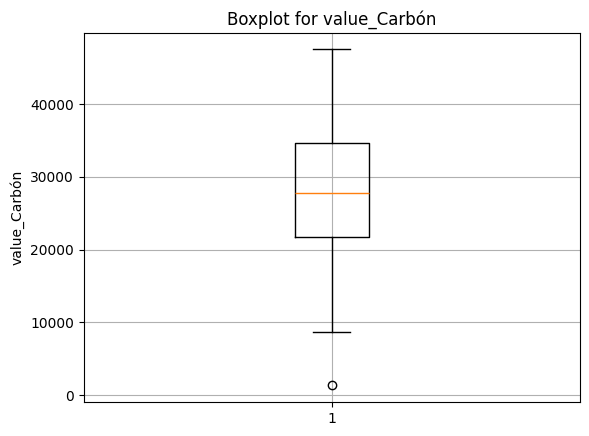

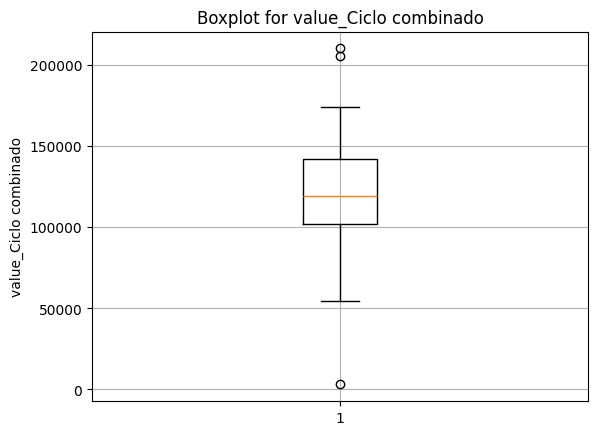

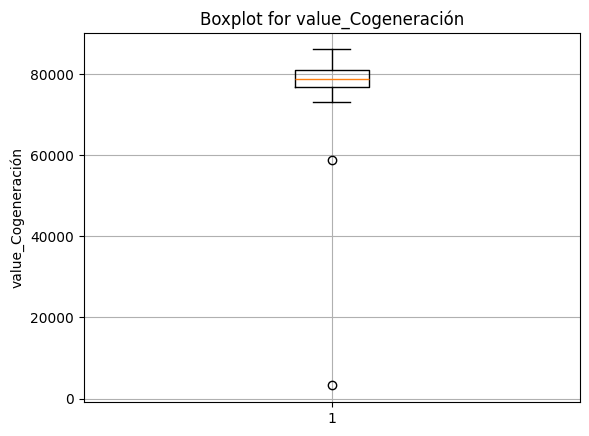

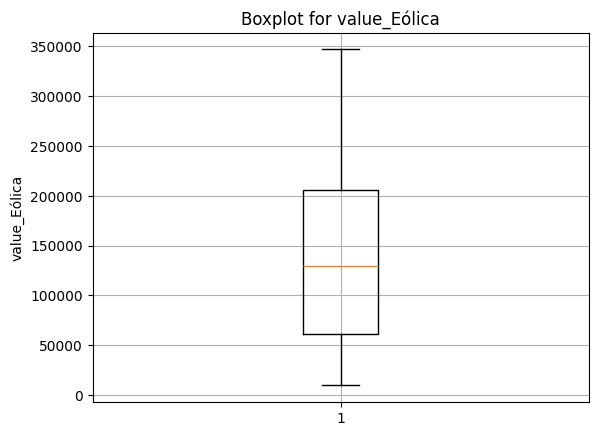

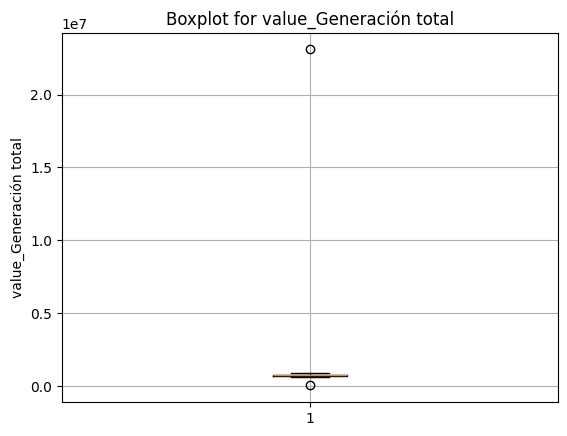

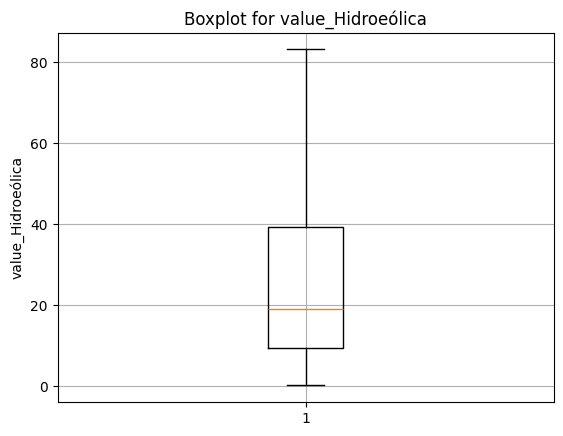

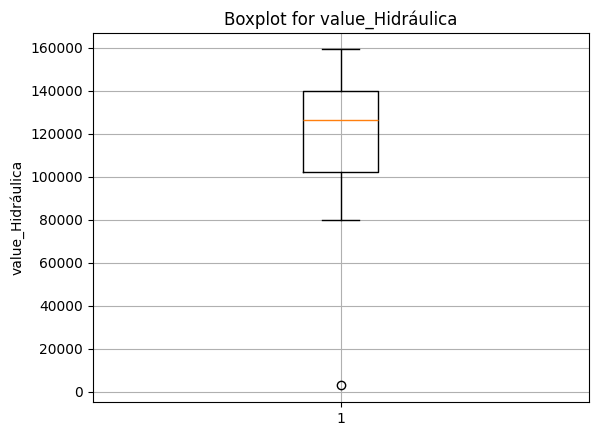

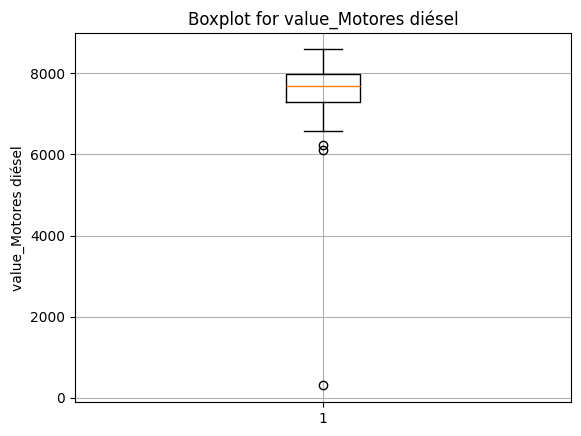

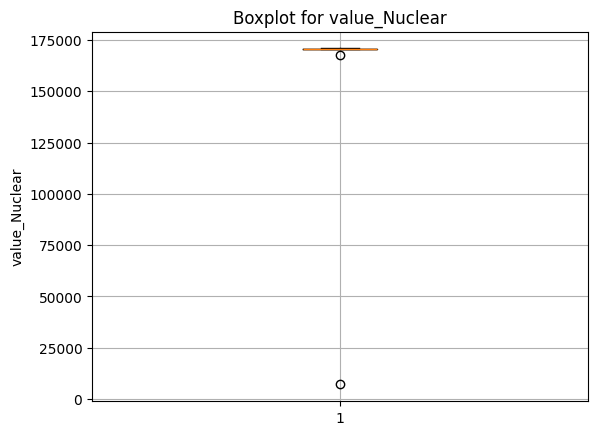

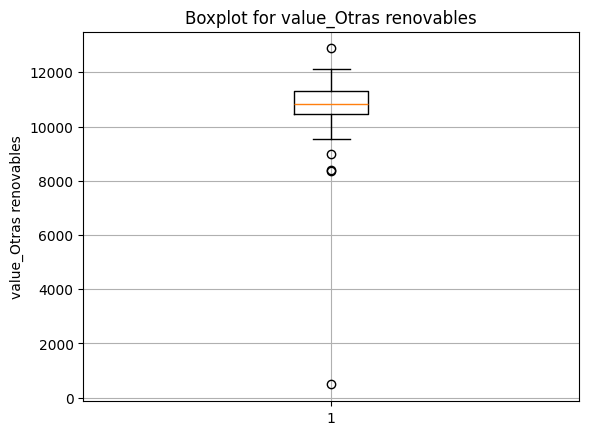

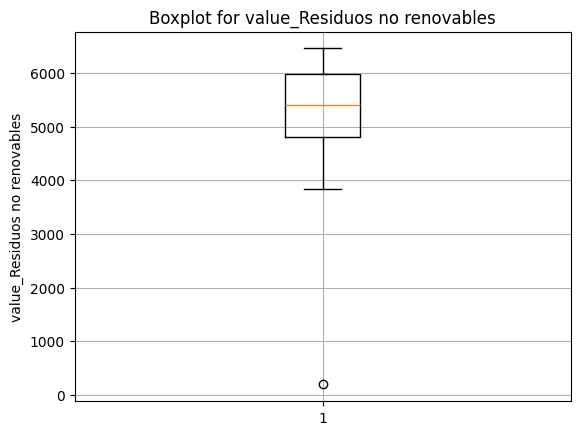

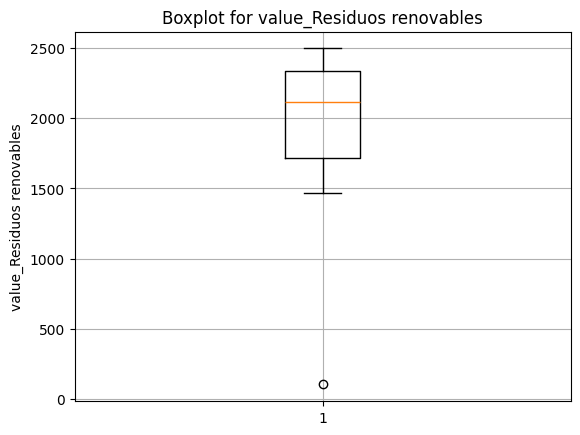

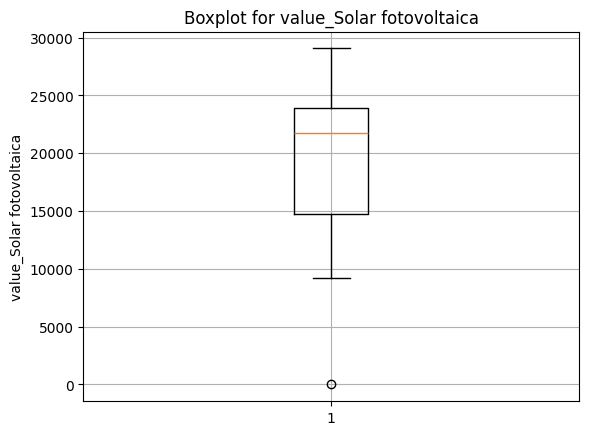

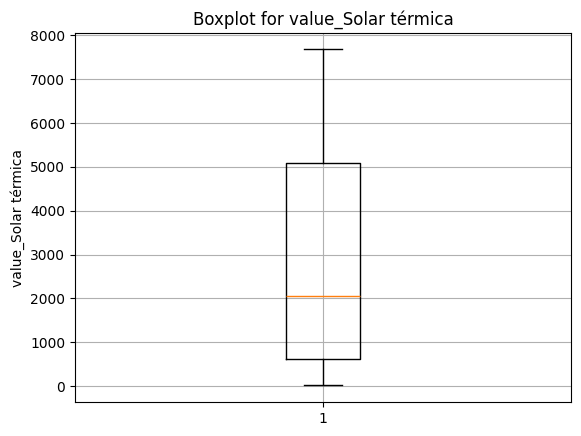

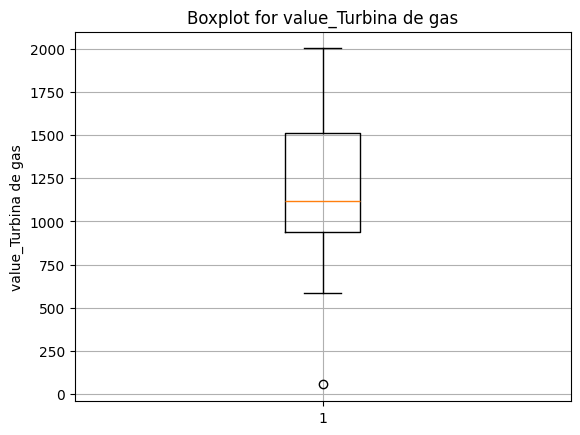

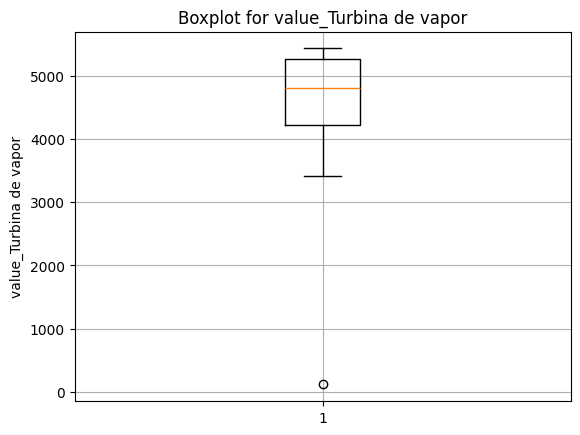

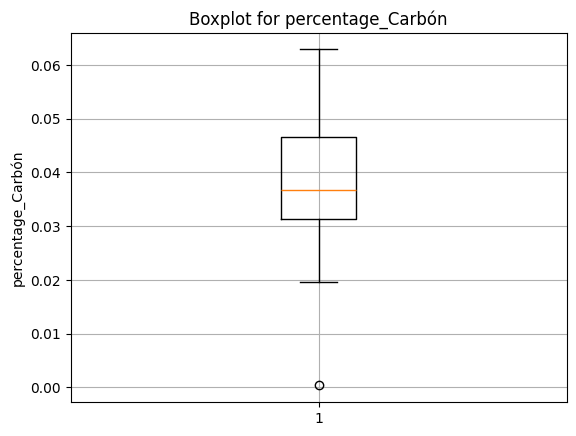

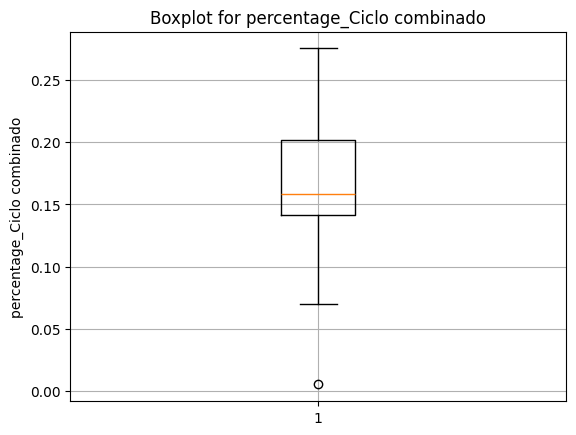

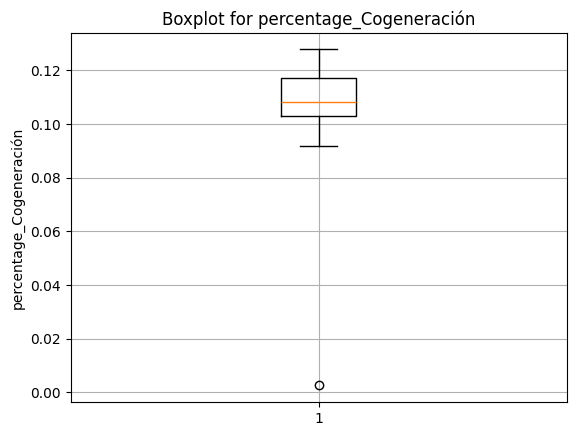

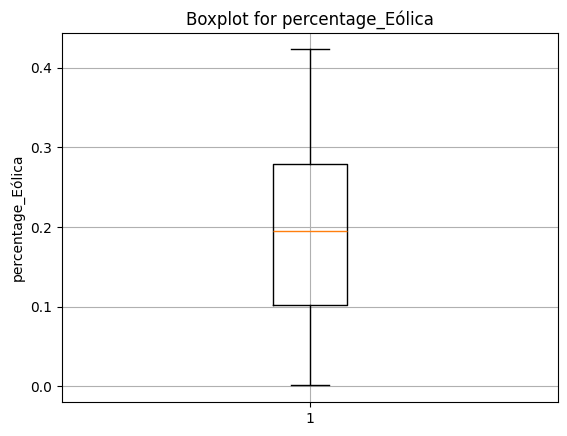

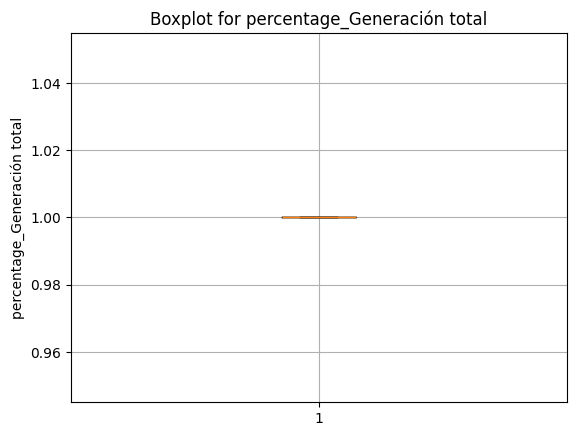

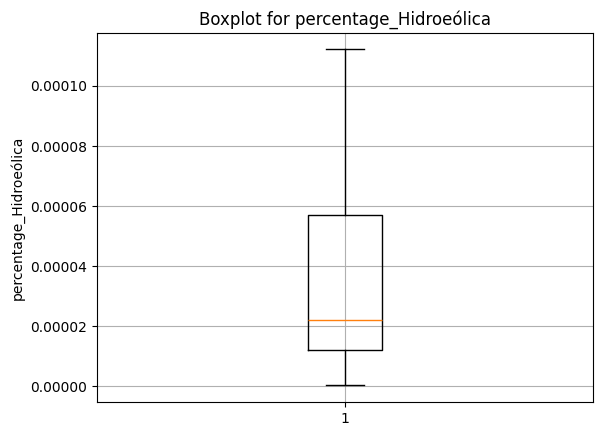

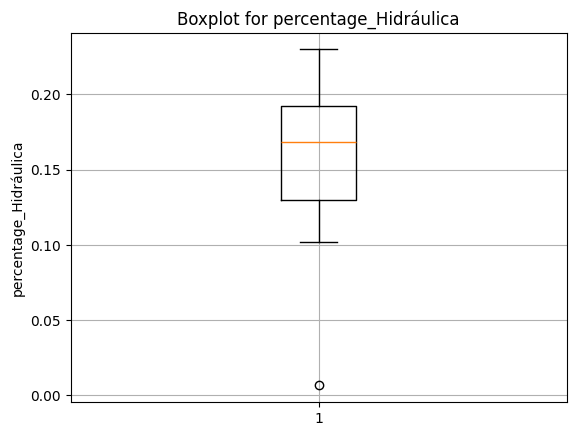

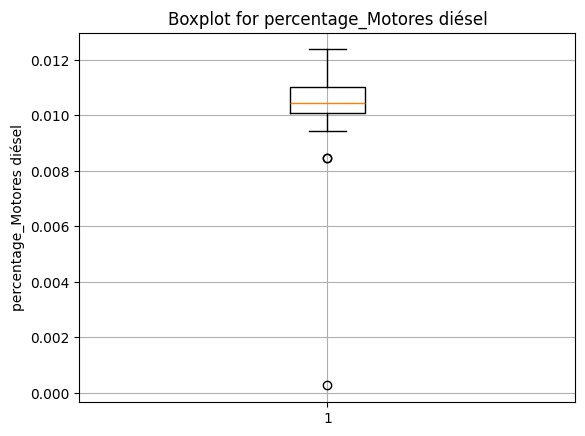

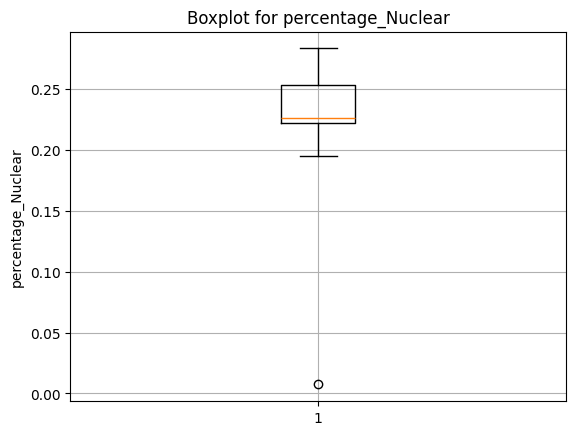

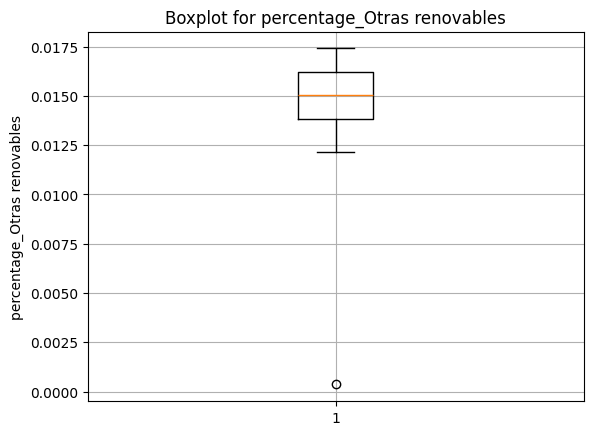

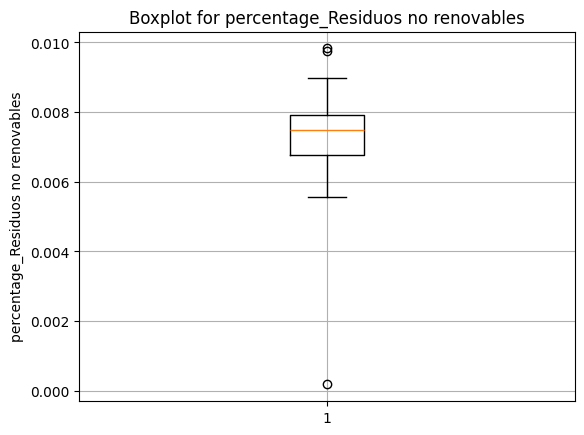

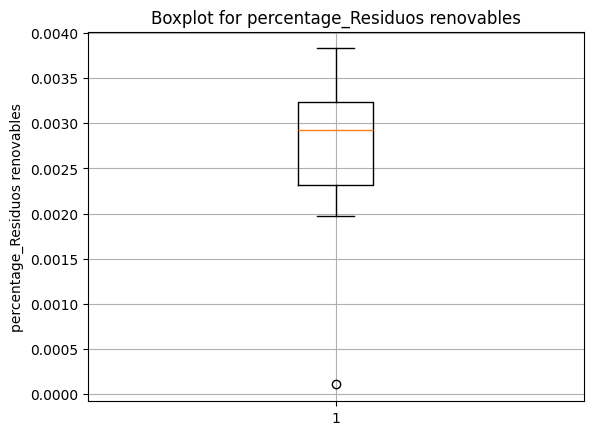

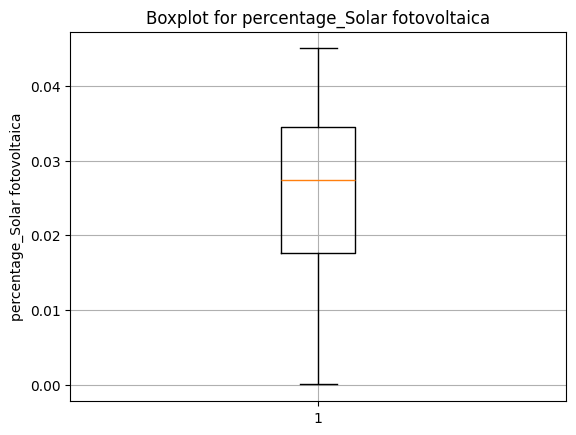

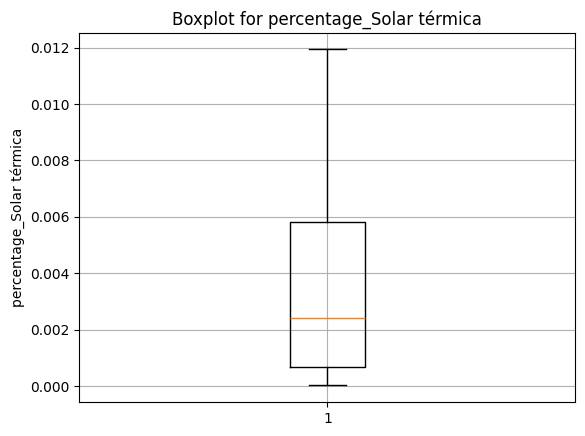

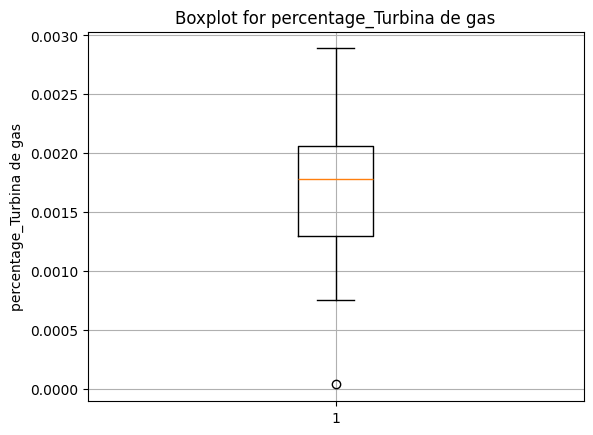

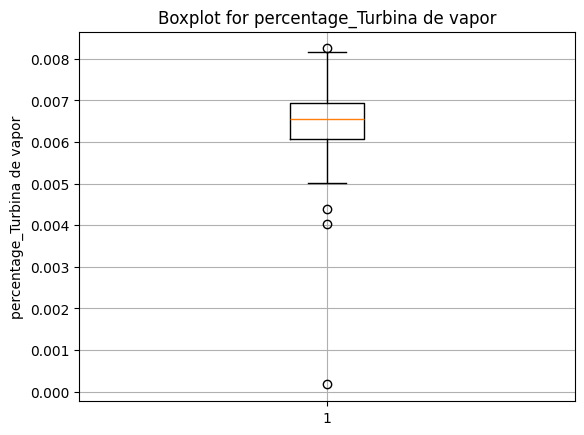

‚ö†Ô∏è Outliers detected in the following columns:
  - percentage_Carb√≥n
  - percentage_Ciclo combinado
  - percentage_Cogeneraci√≥n
  - percentage_Hidr√°ulica
  - percentage_Motores di√©sel
  - percentage_Nuclear
  - percentage_Otras renovables
  - percentage_Residuos no renovables
  - percentage_Residuos renovables
  - percentage_Turbina de gas
  - percentage_Turbina de vapor
  - value_Carb√≥n
  - value_Ciclo combinado
  - value_Cogeneraci√≥n
  - value_Generaci√≥n total
  - value_Hidr√°ulica
  - value_Motores di√©sel
  - value_Nuclear
  - value_Otras renovables
  - value_Residuos no renovables
  - value_Residuos renovables
  - value_Solar fotovoltaica
  - value_Turbina de gas
  - value_Turbina de vapor

üìå Treatment applied: Replaced Z-score outliers (>3œÉ) with NaN.


In [10]:
# Check daily data for outliers values
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assume daily_pivot is already prepared as described earlier
# Exclude 'datetime' column
data = daily_pivot.select_dtypes(include=[np.number])

# -------------------------
# 1. Z-score Method
# -------------------------
z_scores = np.abs(stats.zscore(data, nan_policy='omit'))
z_outliers = (z_scores > 3)

z_outlier_cols = data.columns[(z_outliers.sum(axis=0) > 0)].tolist()

# -------------------------
# 2. IQR Method
# -------------------------
iqr_outlier_cols = []
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    if not outliers.empty:
        iqr_outlier_cols.append(col)

# -------------------------
# 3. Boxplot Visualization
# -------------------------
for col in data.columns:
    plt.figure()
    plt.boxplot(data[col].dropna())
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# -------------------------
# 4. Summary Output
# -------------------------
if not z_outlier_cols and not iqr_outlier_cols:
    print("‚úÖ No outliers found using Z-score or IQR methods.")
else:
    all_outlier_cols = sorted(set(z_outlier_cols + iqr_outlier_cols))
    print("‚ö†Ô∏è Outliers detected in the following columns:")
    for col in all_outlier_cols:
        print(f"  - {col}")

    # Optional treatment (e.g., replacing with NaN or clipping)
    # Example: Replace extreme Z-score outliers with NaN
    for col in all_outlier_cols:
        daily_pivot.loc[z_outliers[:, data.columns.get_loc(col)], col] = np.nan

    print("\nüìå Treatment applied: Replaced Z-score outliers (>3œÉ) with NaN.")

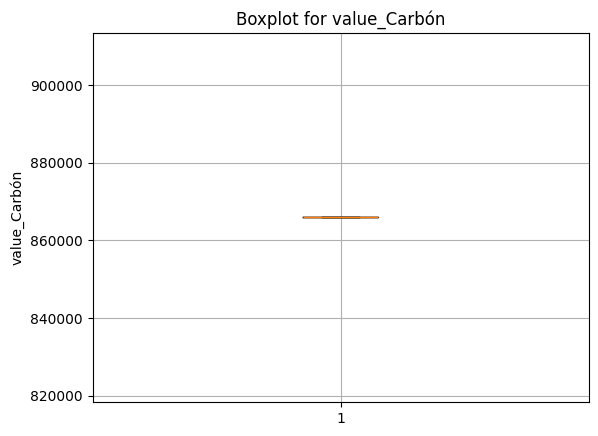

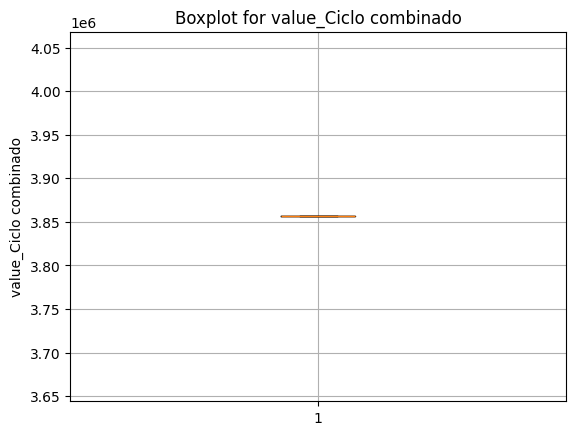

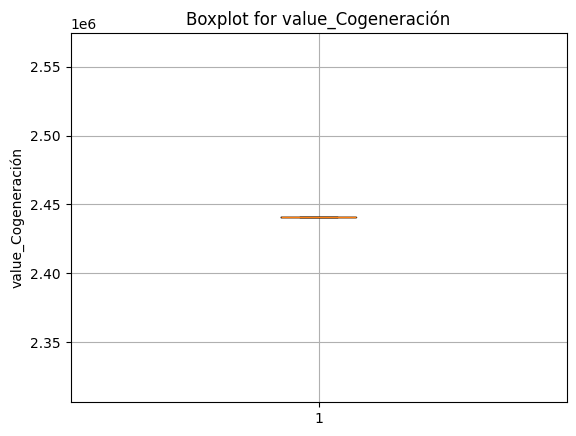

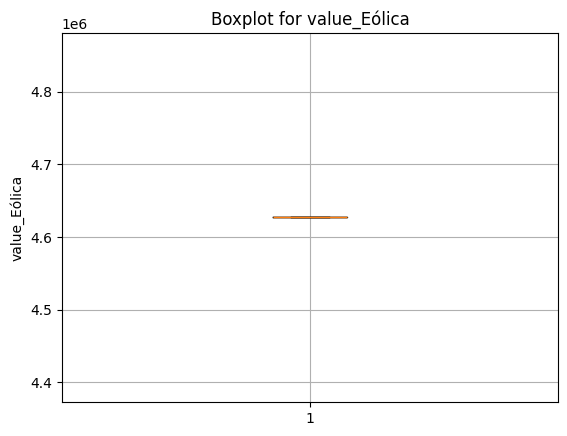

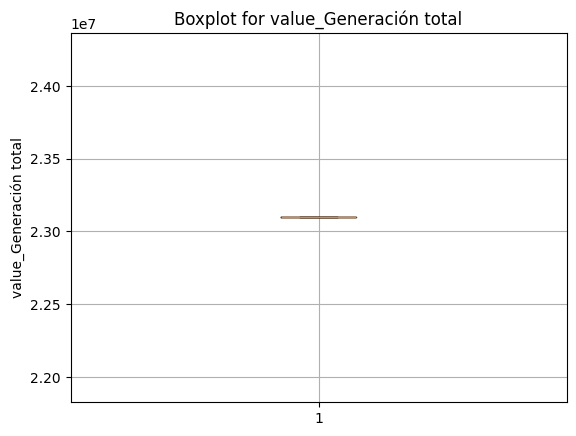

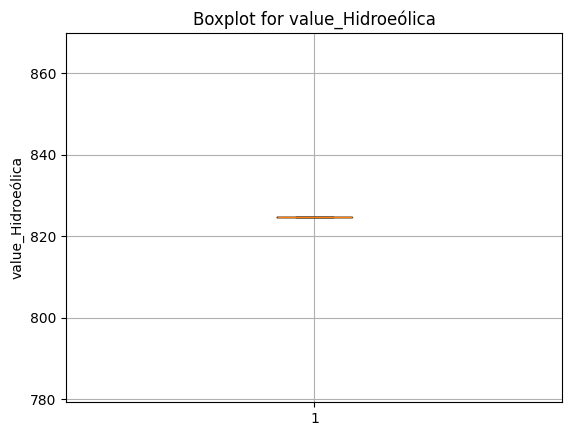

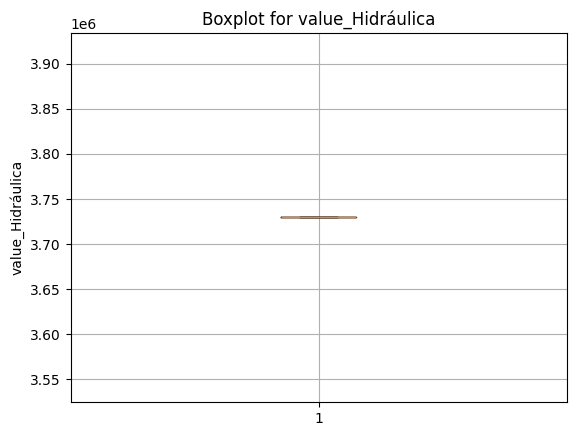

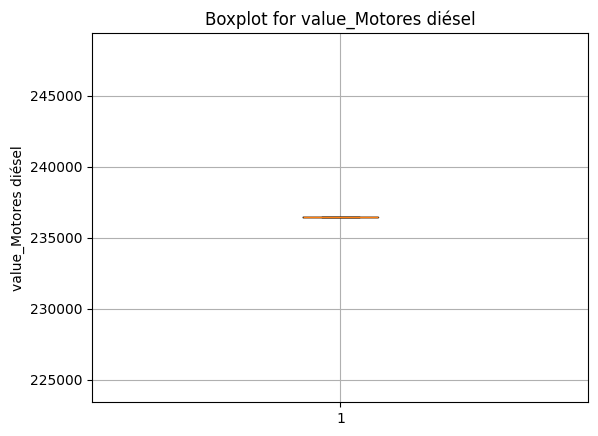

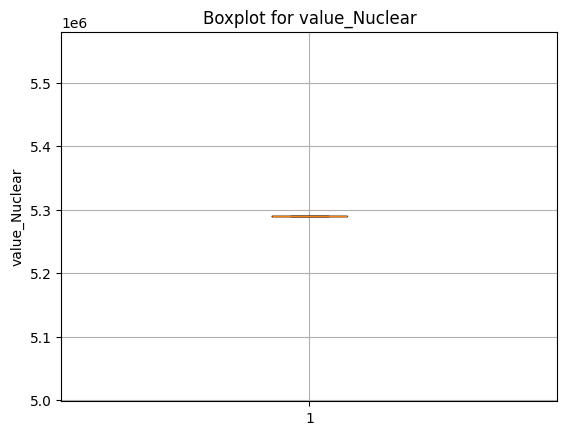

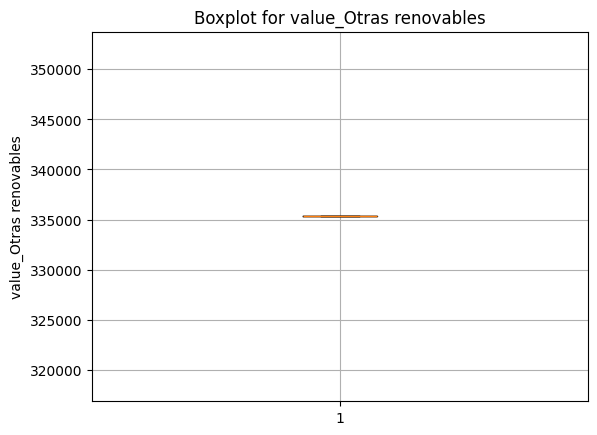

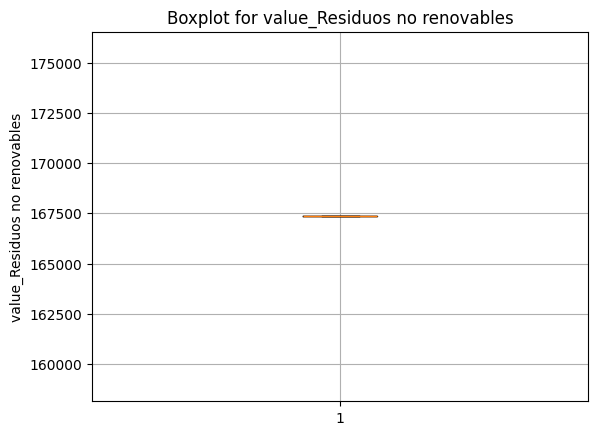

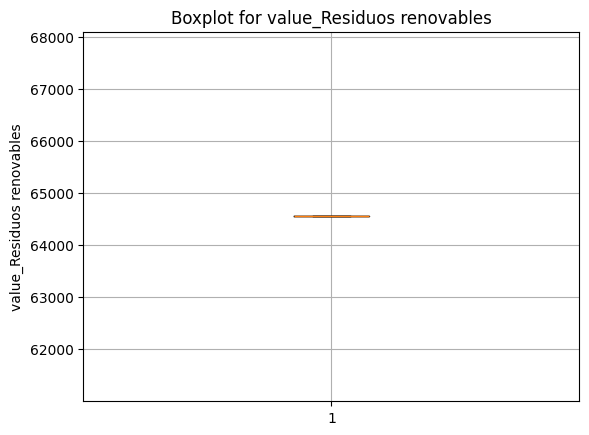

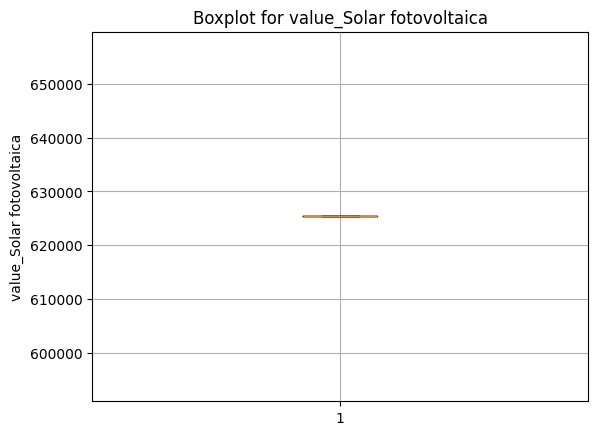

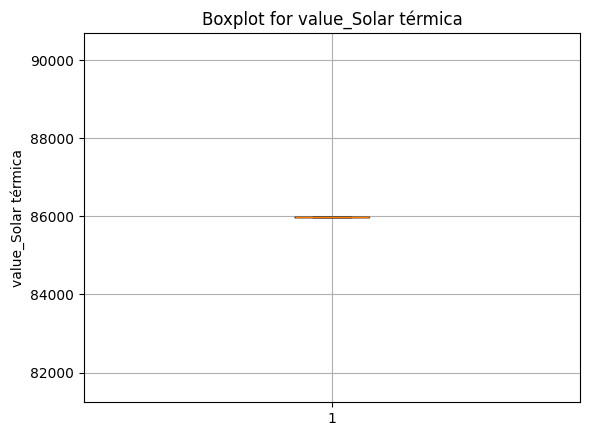

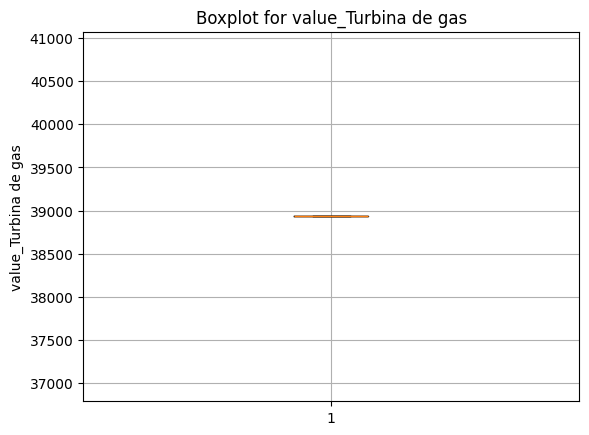

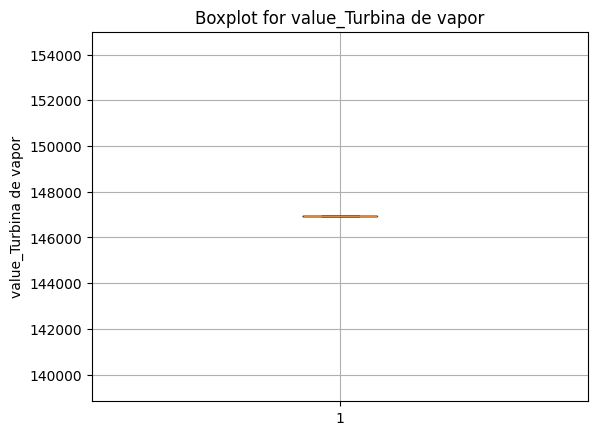

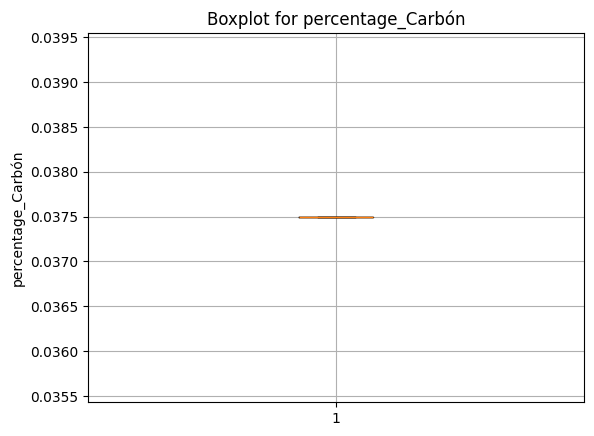

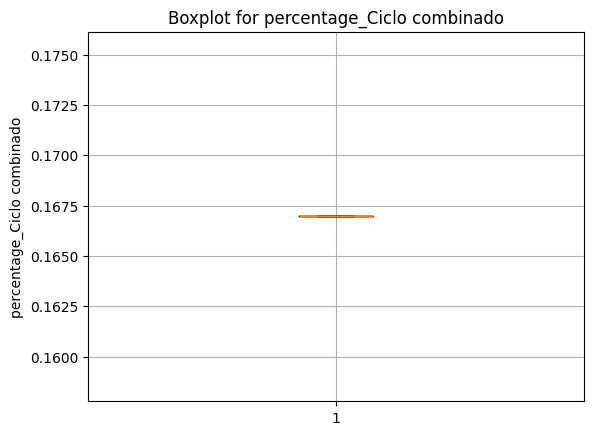

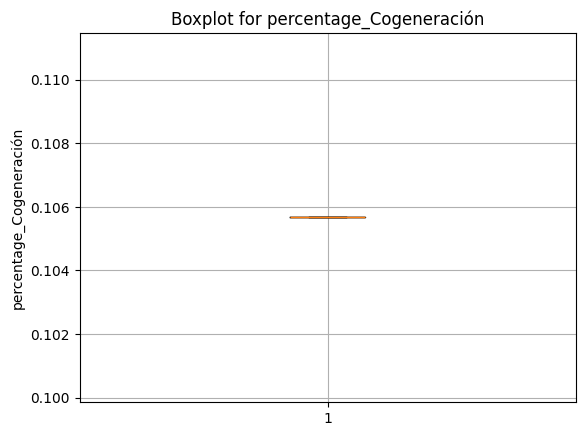

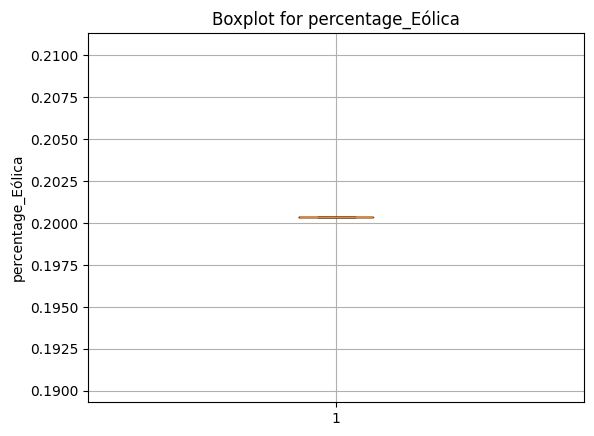

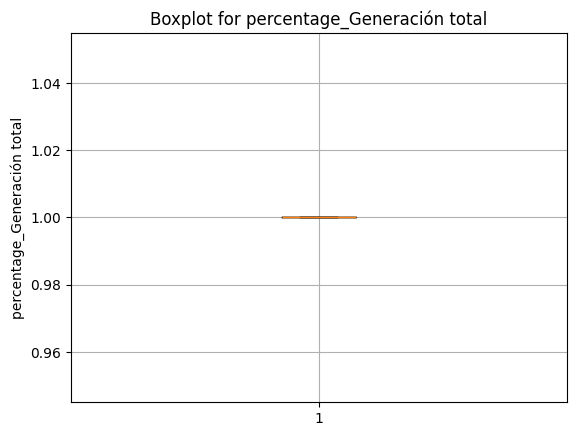

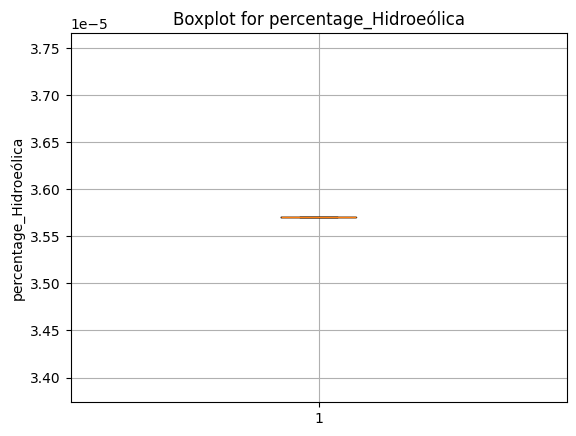

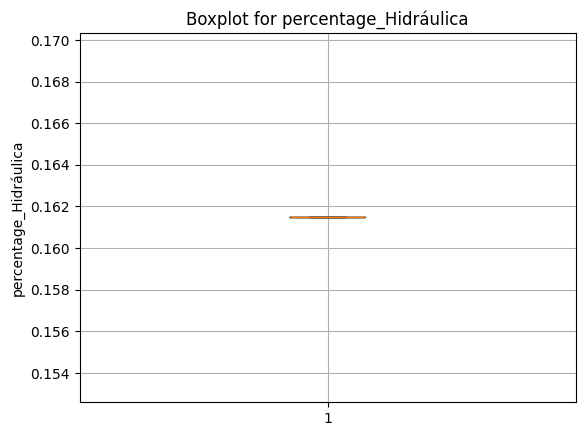

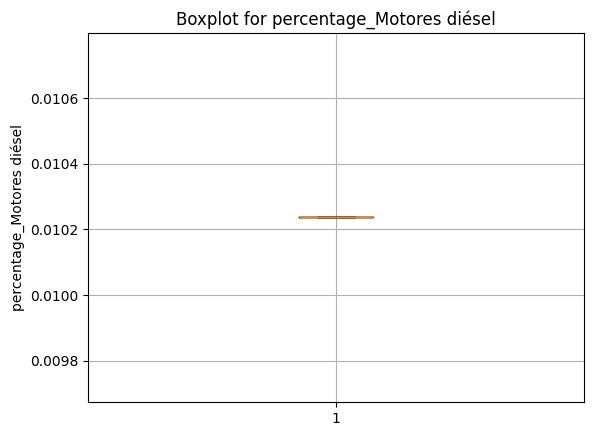

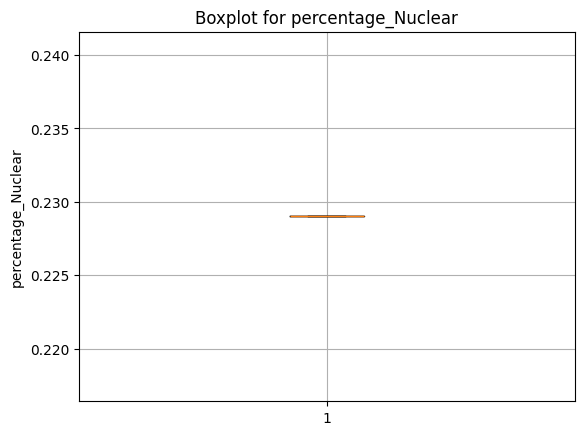

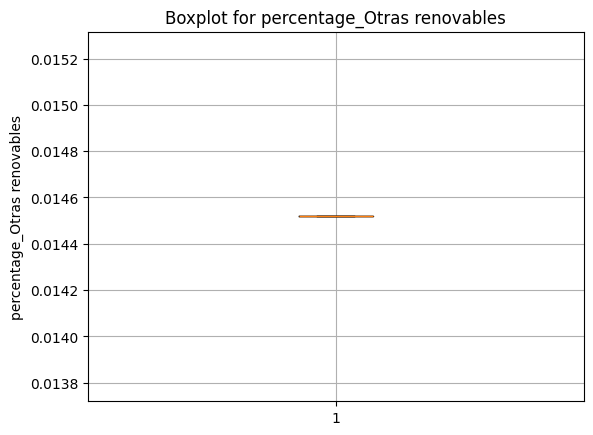

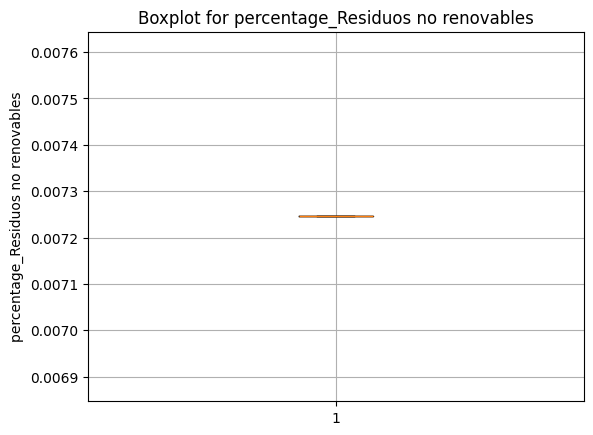

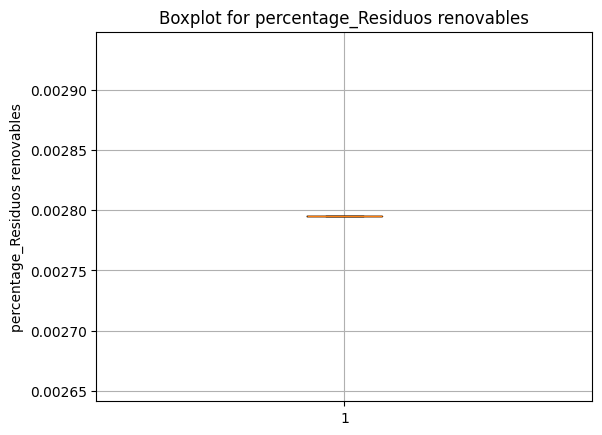

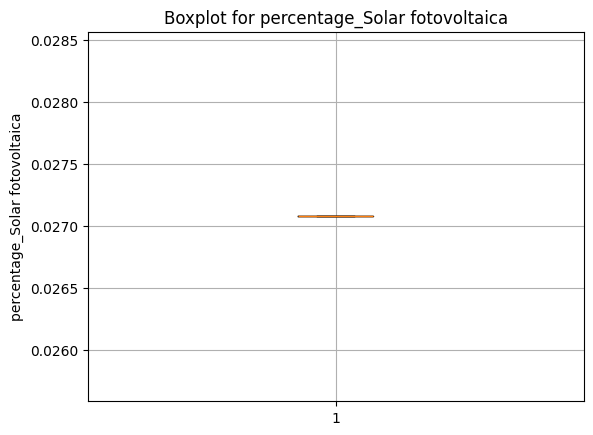

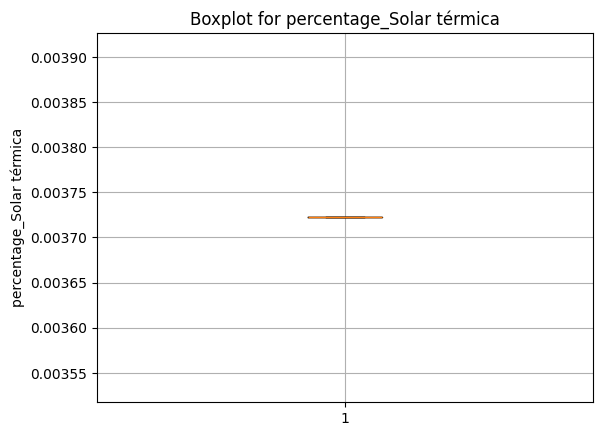

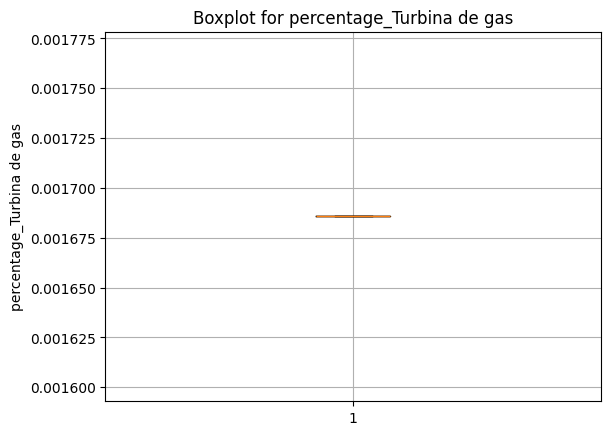

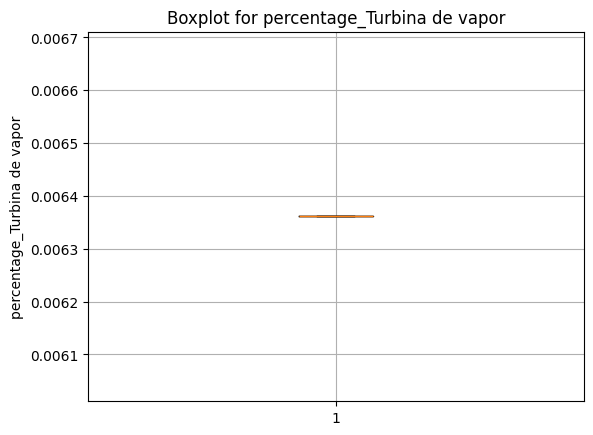

‚úÖ No outliers found in monthly data using Z-score or IQR methods.


In [11]:
# Check for outliers in monthly data
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assume monthly_pivot is already prepared
# Remove 'month' column for numeric analysis
data = monthly_pivot.select_dtypes(include=[np.number])

# -------------------------
# 1. Z-score Method
# -------------------------
z_scores = np.abs(stats.zscore(data, nan_policy='omit'))
z_outliers = (z_scores > 3)

z_outlier_cols = data.columns[(z_outliers.sum(axis=0) > 0)].tolist()

# -------------------------
# 2. IQR Method
# -------------------------
iqr_outlier_cols = []
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    if not outliers.empty:
        iqr_outlier_cols.append(col)

# -------------------------
# 3. Boxplot Visualization
# -------------------------
for col in data.columns:
    plt.figure()
    plt.boxplot(data[col].dropna())
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# -------------------------
# 4. Summary Output
# -------------------------
if not z_outlier_cols and not iqr_outlier_cols:
    print("‚úÖ No outliers found in monthly data using Z-score or IQR methods.")
else:
    all_outlier_cols = sorted(set(z_outlier_cols + iqr_outlier_cols))
    print("‚ö†Ô∏è Outliers detected in the following columns of monthly data:")
    for col in all_outlier_cols:
        print(f"  - {col}")

    # Optional treatment: Replace Z-score outliers with NaN
    for col in all_outlier_cols:
        monthly_pivot.loc[z_outliers[:, data.columns.get_loc(col)], col] = np.nan

    print("\nüìå Treatment applied: Z-score outliers (>3œÉ) replaced with NaN in monthly data.")

In [12]:
# Check data for duplicate values in daily_pivot
duplicates = daily_pivot.duplicated()

if not duplicates.any():
    print("‚úÖ No duplicates found in daily data.")
else:
    num_duplicates = duplicates.sum()
    print(f"‚ö†Ô∏è {num_duplicates} duplicate rows found in daily data.")
    daily_pivot = daily_pivot.drop_duplicates()
    print("üßπ Treatment applied: Duplicate rows were removed from daily data.")

‚úÖ No duplicates found in daily data.


In [13]:
# Check data for duplicate values in monthly_pivot
duplicates = monthly_pivot.duplicated()

if not duplicates.any():
    print("‚úÖ No duplicates found in monthly data.")
else:
    num_duplicates = duplicates.sum()
    print(f"‚ö†Ô∏è {num_duplicates} duplicate rows found in monthly data.")
    monthly_pivot = monthly_pivot.drop_duplicates()
    print("üßπ Treatment applied: Duplicate rows were removed from monthly data.")

‚úÖ No duplicates found in monthly data.


In [14]:
# Check for NaN/null values in daily_pivot
null_counts = daily_pivot.isnull().sum()
total_null_rows = daily_pivot.isnull().any(axis=1).sum()

if total_null_rows == 0:
    print("‚úÖ No NaN/null values found in daily data.")
else:
    print("‚ö†Ô∏è NaN/null values found in the following columns of daily data:")
    print(null_counts[null_counts > 0])
    print(f"üßπ Total rows with NaNs to be removed: {total_null_rows}")

    # Drop rows with any NaNs
    daily_pivot = daily_pivot.dropna()
    print("üìå Treatment applied: Rows with NaN values were dropped from daily data.")

‚ö†Ô∏è NaN/null values found in the following columns of daily data:
value_Cogeneraci√≥n                   1
value_Generaci√≥n total               1
value_Hidr√°ulica                     1
value_Motores di√©sel                 1
value_Nuclear                        1
value_Otras renovables               1
value_Residuos no renovables         1
value_Residuos renovables            1
value_Solar t√©rmica                  1
value_Turbina de vapor               1
percentage_Cogeneraci√≥n              1
percentage_Hidr√°ulica                1
percentage_Motores di√©sel            1
percentage_Nuclear                   1
percentage_Otras renovables          1
percentage_Residuos no renovables    1
percentage_Residuos renovables       1
percentage_Solar t√©rmica             1
percentage_Turbina de vapor          1
dtype: int64
üßπ Total rows with NaNs to be removed: 2
üìå Treatment applied: Rows with NaN values were dropped from daily data.


In [15]:
# Check for NaN/null values in monthly_pivot
null_counts = monthly_pivot.isnull().sum()
total_null_rows = monthly_pivot.isnull().any(axis=1).sum()

if total_null_rows == 0:
    print("‚úÖ No NaN/null values found in monthly data.")
else:
    print("‚ö†Ô∏è NaN/null values found in the following columns of monthly data:")
    print(null_counts[null_counts > 0])
    print(f"üßπ Total rows with NaNs to be removed: {total_null_rows}")

    # Drop rows with any NaNs
    monthly_pivot = monthly_pivot.dropna()
    print("üìå Treatment applied: Rows with NaN values were dropped from monthly data.")

‚úÖ No NaN/null values found in monthly data.


In [16]:
# Information about daily_pivot
daily_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1 to 29
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype                    
---  ------                             --------------  -----                    
 0   datetime                           29 non-null     datetime64[ns, UTC+01:00]
 1   value_Carb√≥n                       29 non-null     float64                  
 2   value_Ciclo combinado              29 non-null     float64                  
 3   value_Cogeneraci√≥n                 29 non-null     float64                  
 4   value_E√≥lica                       29 non-null     float64                  
 5   value_Generaci√≥n total             29 non-null     float64                  
 6   value_Hidroe√≥lica                  29 non-null     float64                  
 7   value_Hidr√°ulica                   29 non-null     float64                  
 8   value_Motores di√©sel               29 non-null     float64            

In [17]:
# Descriptive statistics about daily_pivot
daily_pivot.describe()

value_Carb√≥n  value_Ciclo combinado  value_Cogeneraci√≥n   value_E√≥lica  \
count     29.000000              29.000000           29.000000      29.000000   
mean   28480.408207          125368.065103        79344.714103  152137.659966   
std     8852.962684           36072.283640         3313.262624   86487.287663   
min    13528.944000           54644.870000        73089.797000   45587.571000   
25%    22964.568000          105270.559000        77322.202000   77426.389000   
50%    27942.786000          119045.523000        78871.247000  135416.026000   
75%    34701.108000          145516.904000        81302.220000  206430.710000   
max    47491.696000          210318.037000        86063.969000  347001.229000   

       value_Generaci√≥n total  value_Hidroe√≥lica  value_Hidr√°ulica  \
count               29.000000          29.000000         29.000000   
mean            730967.031966          27.255172     120125.119828   
std              65622.576502          25.147957      22336.034863   
min             602982.974000           0.200000      80016.253000   
25%             672539.279000          10.860000     103275.679000   
50%             756045.101000          19.093000     126556.491000   
75%             768769.911000          40.872000     139703.137000   
max             861669.177000          83.152000     159171.675000   

       value_Motores di√©sel  value_Nuclear  value_Otras renovables  ...  \
count             29.000000      29.000000               29.000000  ...   
mean            7665.935448  170615.376379            10880.059552  ...   
std              567.916587     542.947879              920.774124  ...   
min             6117.604000  167839.564000             8407.882000  ...   
25%             7329.940000  170608.729000            10499.567000  ...   
50%             7750.610000  170720.825000            10871.684000  ...   
75%             8026.247000  170794.414000            11445.010000  ...   
max             8589.298000  170888.033000            12879.051000  ...   

       percentage_Hidr√°ulica  percentage_Motores di√©sel  percentage_Nuclear  \
count              29.000000                  29.000000           29.000000   
mean                0.166151                   0.010538            0.235312   
std                 0.036695                   0.000897            0.022023   
min                 0.106207                   0.008457            0.194784   
25%                 0.132299                   0.010117            0.222070   
50%                 0.169486                   0.010430            0.225906   
75%                 0.195077                   0.011042            0.253627   
max                 0.229885                   0.012374            0.283002   

       percentage_Otras renovables  percentage_Residuos no renovables  \
count                    29.000000                          29.000000   
mean                      0.014961                           0.007483   
std                       0.001472                           0.001049   
min                       0.012143                           0.005550   
25%                       0.013839                           0.006913   
50%                       0.015063                           0.007554   
75%                       0.016188                           0.007931   
max                       0.017400                           0.009826   

       percentage_Residuos renovables  percentage_Solar fotovoltaica  \
count                       29.000000                      29.000000   
mean                         0.002837                       0.027937   
std                          0.000529                       0.009670   
min                          0.001970                       0.010971   
25%                          0.002354                       0.019721   
50%                          0.002922                       0.028072   
75%                          0.003230                       0.035480   
max            

In [18]:
# Information about monthly_pivot
monthly_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype    
---  ------                             --------------  -----    
 0   month                              1 non-null      period[M]
 1   value_Carb√≥n                       1 non-null      float64  
 2   value_Ciclo combinado              1 non-null      float64  
 3   value_Cogeneraci√≥n                 1 non-null      float64  
 4   value_E√≥lica                       1 non-null      float64  
 5   value_Generaci√≥n total             1 non-null      float64  
 6   value_Hidroe√≥lica                  1 non-null      float64  
 7   value_Hidr√°ulica                   1 non-null      float64  
 8   value_Motores di√©sel               1 non-null      float64  
 9   value_Nuclear                      1 non-null      float64  
 10  value_Otras renovables             1 non-null      float64  
 11  value_Residuos no renovables 

In [19]:
# Descriptive statistics about monthly_pivot
monthly_pivot.describe()

value_Carb√≥n  value_Ciclo combinado  value_Cogeneraci√≥n  value_E√≥lica  \
count         1.000                  1.000               1.000         1.000   
mean     865887.004            3856118.343         2440531.494   4626864.398   
std             NaN                    NaN                 NaN           NaN   
min      865887.004            3856118.343         2440531.494   4626864.398   
25%      865887.004            3856118.343         2440531.494   4626864.398   
50%      865887.004            3856118.343         2440531.494   4626864.398   
75%      865887.004            3856118.343         2440531.494   4626864.398   
max      865887.004            3856118.343         2440531.494   4626864.398   

       value_Generaci√≥n total  value_Hidroe√≥lica  value_Hidr√°ulica  \
count            1.000000e+00               1.00             1.000   
mean             2.309634e+07             824.55       3729343.838   
std                       NaN                NaN               NaN   
min              2.309634e+07             824.55       3729343.838   
25%              2.309634e+07             824.55       3729343.838   
50%              2.309634e+07             824.55       3729343.838   
75%              2.309634e+07             824.55       3729343.838   
max              2.309634e+07             824.55       3729343.838   

       value_Motores di√©sel  value_Nuclear  value_Otras renovables  ...  \
count                 1.000          1.000                   1.000  ...   
mean             236418.961    5289146.024              335311.749  ...   
std                     NaN            NaN                     NaN  ...   
min              236418.961    5289146.024              335311.749  ...   
25%              236418.961    5289146.024              335311.749  ...   
50%              236418.961    5289146.024              335311.749  ...   
75%              236418.961    5289146.024              335311.749  ...   
max              236418.961    5289146.024              335311.749  ...   

       percentage_Hidr√°ulica  percentage_Motores di√©sel  percentage_Nuclear  \
count               1.000000                   1.000000            1.000000   
mean                0.161469                   0.010236            0.229004   
std                      NaN                        NaN                 NaN   
min                 0.161469                   0.010236            0.229004   
25%                 0.161469                   0.010236            0.229004   
50%                 0.161469                   0.010236            0.229004   
75%                 0.161469                   0.010236            0.229004   
max                 0.161469                   0.010236            0.229004   

       percentage_Otras renovables  percentage_Residuos no renovables  \
count                     1.000000                           1.000000   
mean                      0.014518                           0.007245   
std                            NaN                                NaN   
min                       0.014518                           0.007245   
25%                       0.014518                           0.007245   
50%                       0.014518                           0.007245   
75%                       0.014518                           0.007245   
max                       0.014518                           0.007245   

       percentage_Residuos renovables  percentage_Solar fotovoltaica  \
count                        1.000000                       1.000000   
mean                         0.002795                       0.027075   
std                               NaN                            NaN   
min                          0.002795                       0.027075   
25%                          0.002795                       0.027075   
50%                          0.002795                       0.027075   
75%                          0.002795                       0.027075   
max                     

## Task 3: Data Visualization and Insights Extraction

This code transforms raw time-series (hourly or daily) data into insightful visualizations by aggregating daily generation values by different time periods (day or week) and presenting them by technology type.

__Input:__
Dataframe 'df' with columns:
- datetime
- value
- percentage
- technology

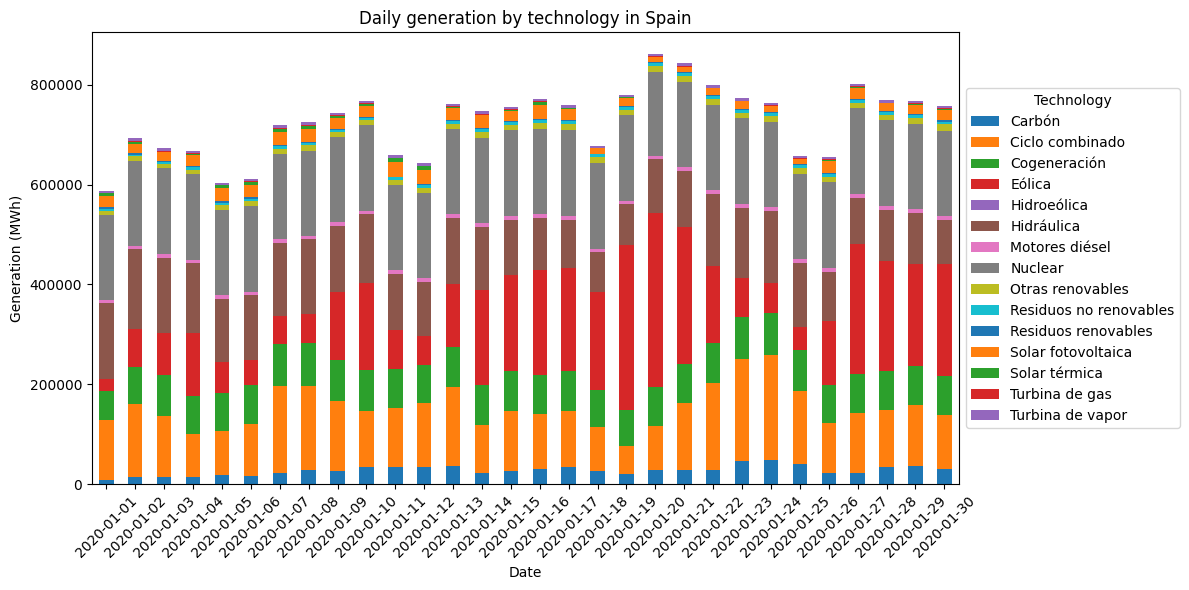

In [20]:
# Daily Energy Generation Bar Graph by Technology
# Exclusive of last date in range
# This sums hourly values for each day, in case hourly data becomes available in this widget in the future

import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["datetime"]).dt.date

# Remove all rows corresponding to the last date in the dataset (the values are abnormally low)
df_truncated = df[df["date"] != df["date"].max()]

# Remove monthly sum values, which are the larger of two values for each tech on the 1st of the month
# Sort so that the larger values come last, and keep only the first
df_truncated = df_truncated.sort_values(["technology", "date", "value"], ascending=[True, True, True])
df_clean = df_truncated.drop_duplicates(subset=["date", "technology"], keep="first")

pivot_df = df_clean.pivot_table(
    index="date",
    columns="technology",
    values="value",
    aggfunc="sum",
    fill_value=0
    )

pivot_df_indiv = pivot_df.drop(columns="Generaci√≥n total", errors="ignore")

pivot_df_indiv.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    title=f"Daily generation by technology in Spain",
    )

plt.xlabel("Date")
plt.ylabel("Generation (MWh)")
plt.xticks(rotation=45)
plt.legend(title="Technology", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

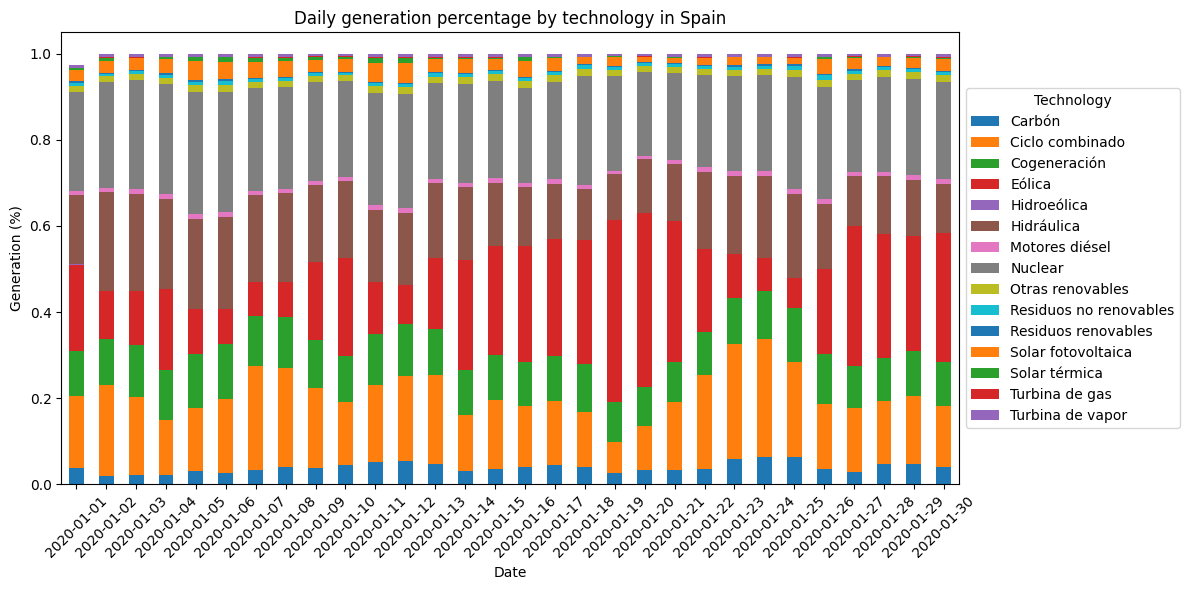

In [21]:
# Daily Energy Generation Percentage Bar Graph by Technology
# Exclusive of last date in range
# This sums hourly percentages for each day, in case hourly data becomes available in this widget in the future

import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["datetime"]).dt.date

# Remove all rows corresponding to the last date in the dataset (the values are abnormally low)
df_truncated = df[df["date"] != df["date"].max()]

# Remove monthly sum percentages, which are the smaller of two values for each tech on the 1st of the month
# Sort so that the smaller percentages come last, and keep only the first
df_truncated = df_truncated.sort_values(["technology", "date", "percentage"], ascending=[True, True, False])
df_clean = df_truncated.drop_duplicates(subset=["date", "technology"], keep="first")

pivot_df = df_clean.pivot_table(
    index="date",
    columns="technology",
    values="percentage",
    aggfunc="sum",
    fill_value=0
    )

pivot_df_indiv = pivot_df.drop(columns="Generaci√≥n total", errors="ignore")

pivot_df_indiv.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    title=f"Daily generation percentage by technology in Spain",
    )

plt.xlabel("Date")
plt.ylabel("Generation (%)")
plt.xticks(rotation=45)
plt.legend(title="Technology", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()


<ipython-input-22-ca607491a598>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["week"] = pd.to_datetime(df_clean["date"]).dt.to_period("W-MON")


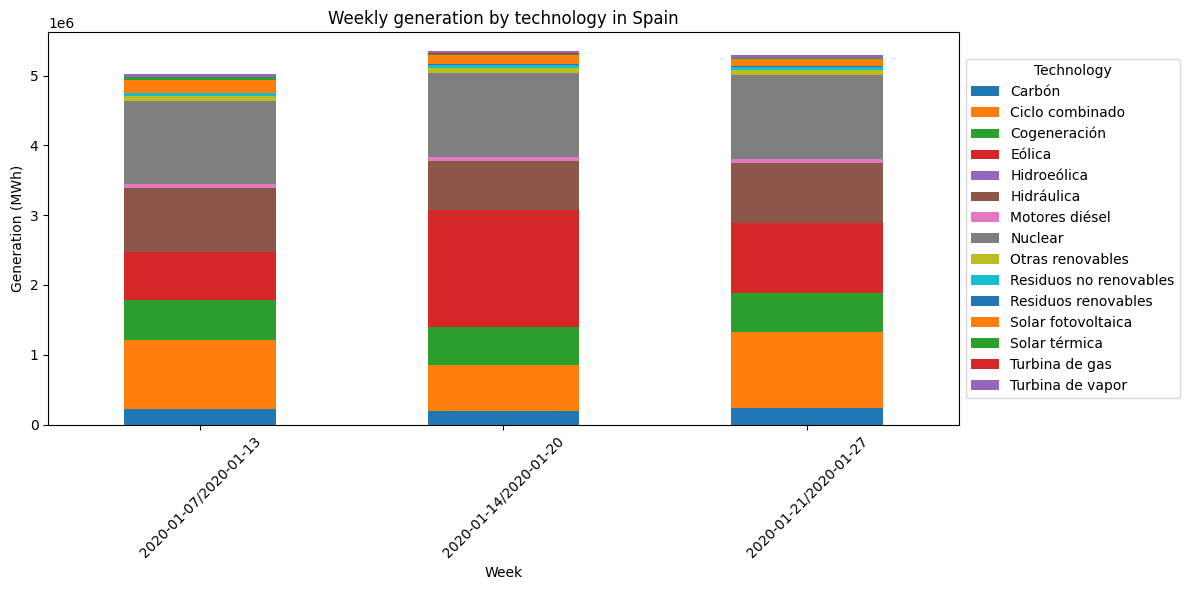

In [22]:
# Weekly Energy Generation Share Bar Graph by Technology
# exclusive of last date in range
# This aggregates percentage values for complete weeks only (starting on Mondays)

import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["datetime"]).dt.date

# Remove all rows corresponding to the last date in the dataset (the values are abnormally low)
df_truncated = df[df["date"] != df["date"].max()]

# Remove monthly sum values, which are the larger of two values for each tech on the 1st of the month
# Sort so that the larger values come last, and keep only the first
df_truncated = df_truncated.sort_values(["technology", "date", "value"], ascending=[True, True, True])
df_clean = df_truncated.drop_duplicates(subset=["date", "technology"], keep="first")

# Add weekly period starting on Monday
df_clean["week"] = pd.to_datetime(df_clean["date"]).dt.to_period("W-MON")

# Count number of days per week
week_counts = df_clean.groupby("week")["date"].nunique()
full_weeks = week_counts[week_counts == 7].index

# Keep only data from full weeks
df_clean = df_clean[df_clean["week"].isin(full_weeks)]

# Pivot the cleaned dataframe
pivot_df = df_clean.pivot_table(
    index="week",
    columns="technology",
    values="value",
    aggfunc="sum",
    fill_value=0
)

pivot_df_indiv = pivot_df.drop(columns="Generaci√≥n total", errors="ignore")

pivot_df_indiv.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    title=f"Weekly generation by technology in Spain",
)

plt.xlabel("Week")
plt.ylabel("Generation (MWh)")
plt.xticks(rotation=45)
plt.legend(title="Technology", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

<ipython-input-23-bdb53a576d2c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["week"] = pd.to_datetime(df_clean["date"]).dt.to_period("W-MON")


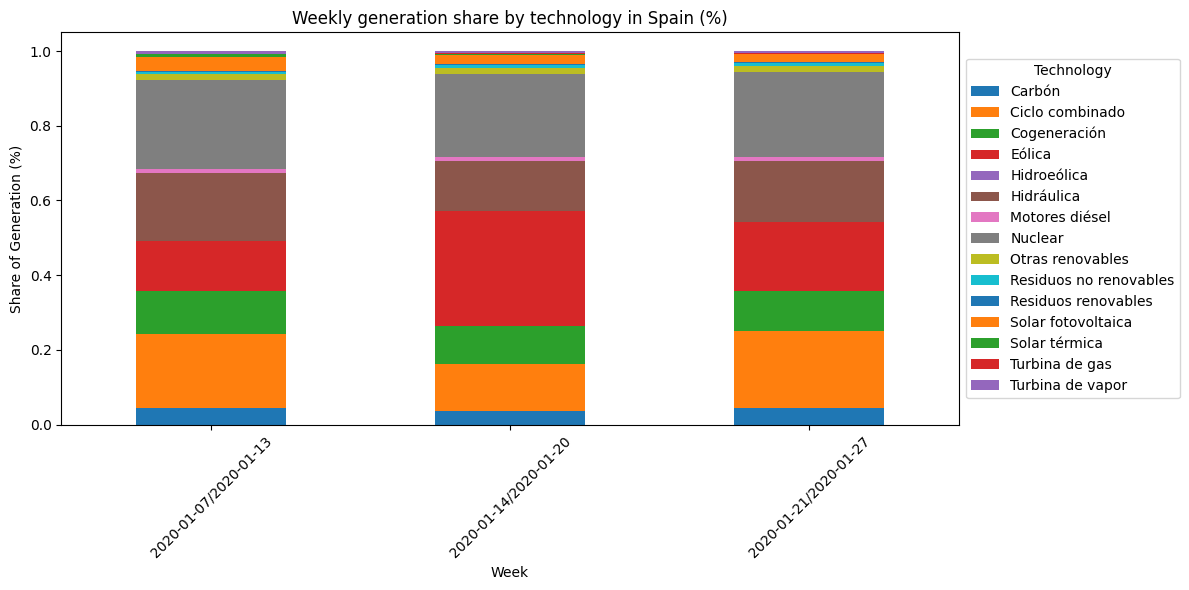

In [23]:
# Weekly Energy Generation Share Bar Graph by Technology (Percentage)
# exclusive of last date in range
# This aggregates percentage values for complete weeks only (starting on Mondays)

import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["datetime"]).dt.date

# Remove all rows corresponding to the last date in the dataset (the values are abnormally low)
df_truncated = df[df["date"] != df["date"].max()]

# Remove monthly sum percentages, which are the smaller of two values for each tech on the 1st of the month
# Sort so that the smaller percentages come last, and keep only the first
df_truncated = df_truncated.sort_values(["technology", "date", "percentage"], ascending=[True, True, False])
df_clean = df_truncated.drop_duplicates(subset=["date", "technology"], keep="first")

# Add weekly period starting on Monday
df_clean["week"] = pd.to_datetime(df_clean["date"]).dt.to_period("W-MON")

# Count number of days per week
week_counts = df_clean.groupby("week")["date"].nunique()
full_weeks = week_counts[week_counts == 7].index

# Keep only data from full weeks
df_clean = df_clean[df_clean["week"].isin(full_weeks)]

# Pivot the cleaned dataframe
pivot_df = df_clean.pivot_table(
    index="week",
    columns="technology",
    values="percentage",
    aggfunc="mean",
    fill_value=0
)

pivot_df_indiv = pivot_df.drop(columns="Generaci√≥n total", errors="ignore")

pivot_df_indiv.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    title=f"Weekly generation share by technology in Spain (%)",
)

plt.xlabel("Week")
plt.ylabel("Share of Generation (%)")
plt.xticks(rotation=45)
plt.legend(title="Technology", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()



Select a technology to generate the chart:

1. Carb√≥n
2. Ciclo combinado
3. Cogeneraci√≥n
4. E√≥lica
5. Generaci√≥n total
6. Hidroe√≥lica
7. Hidr√°ulica
8. Motores di√©sel
9. Nuclear
10. Otras renovables
11. Residuos no renovables
12. Residuos renovables
13. Solar fotovoltaica
14. Solar t√©rmica
15. Turbina de gas
16. Turbina de vapor

Enter the number of the selected technology: 7

You selected: Hidr√°ulica


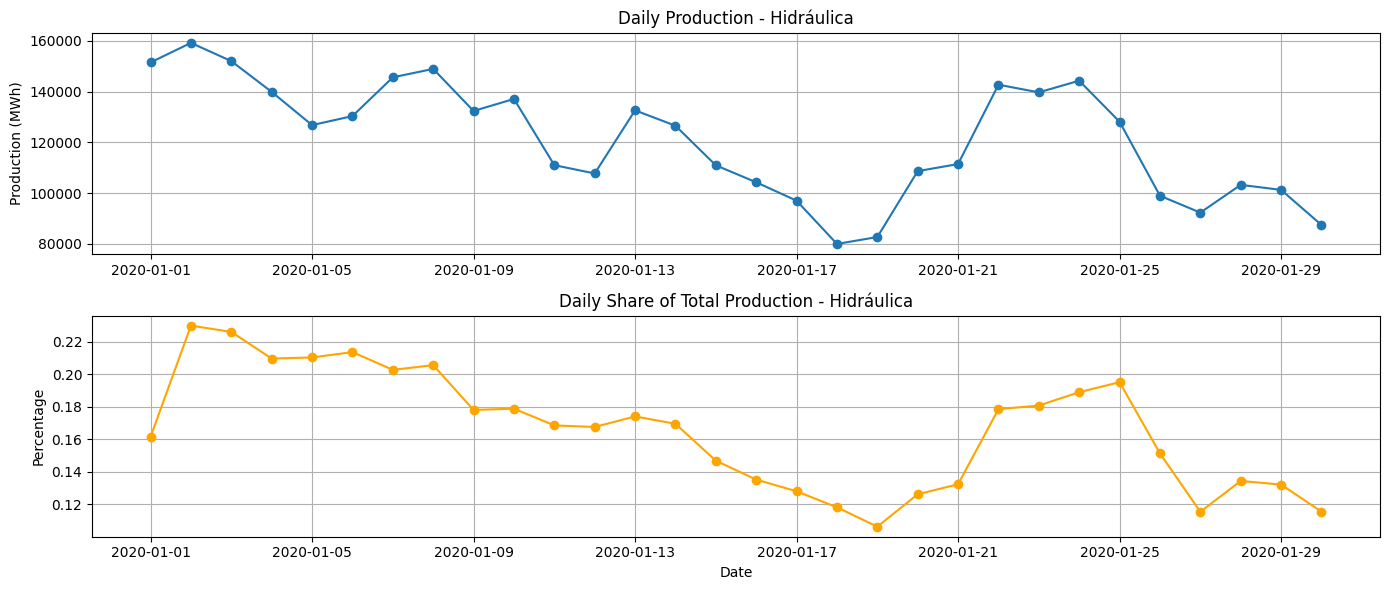

In [24]:
# Daily Energy Generation Line Charts by Technology
# This script lets the user select a technology from the dataset and shows two line charts:
# one for daily total production (in MWh) and one for average daily percentage.
# It groups and sums values by day to visualize trends over time.

import pandas as pd
import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["datetime"]).dt.date

# Get unique technologies and create the dynamic menu
tech_list = sorted(df['technology'].unique())

df_trunc = df[df["date"] != df["date"].max()]

df_trunc_val = df_trunc.sort_values(["technology", "date", "value"], ascending=[True, True, True])
df_trunc_val = df_trunc_val.drop_duplicates(subset=["date", "technology"], keep="first")

df_trunc_perc = df_trunc.sort_values(["technology", "date", "percentage"], ascending=[True, True, False])
df_trunc_perc = df_trunc_perc.drop_duplicates(subset=["date", "technology"], keep="first")

# Menu and input loop
selected_tech = None
while selected_tech is None:
    print("\nSelect a technology to generate the chart:\n")
    for idx, tech in enumerate(tech_list, start=1):
        print(f"{idx}. {tech}")

    user_input = input("\nEnter the number of the selected technology: ")
    try:
        choice = int(user_input)
        if 1 <= choice <= len(tech_list):
            selected_tech = tech_list[choice - 1]
        else:
            print("Number out of range. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a number.")

print(f"\nYou selected: {selected_tech}")

df_val_filtered = df_trunc_val[df_trunc_val['technology'] == selected_tech]
df_perc_filtered = df_trunc_perc[df_trunc_perc['technology'] == selected_tech]

grouped_val = df_val_filtered.groupby('date')['value'].sum().reset_index()
grouped_perc = df_perc_filtered.groupby('date')['percentage'].mean().reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(grouped_val['date'], grouped_val['value'], marker='o')
plt.title(f'Daily Production - {selected_tech}')
plt.ylabel('Production (MWh)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(grouped_perc['date'], grouped_perc['percentage'], marker='o', color='orange')
plt.title(f'Daily Share of Total Production - {selected_tech}')
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.grid(True)

plt.tight_layout()
plt.show()

## Task 4: Comparison of the results of the different sources

__Inputs:__
- Data of Red El√©ctrica de Espa√±a (REE) API
- Wind data from maritime observations in NOOA corresponding to the Spanish coasts 'Group4_data_noaa_wind_miami_2015_2023.csv' (Group 4)
- Wind Energy Generation data extracted from ESIOS 'Group2_data_WIND_DATA.csv' (Group 2)

In [25]:
# Collect all the available data

# Availabe REE data
REE_daily = daily_pivot.copy()
REE_monthly = monthly_pivot.copy()


# Group 4 wind data
g4_data = pd.read_csv('Group4_data_noaa_wind_miami_2015_2023.csv')

# Group 2
g2_data = pd.read_csv('Group2_data_WIND_DATA.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'Group4_data_noaa_wind_miami_2015_2023.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

daily_pivot['datetime'] = pd.to_datetime(daily_pivot['datetime'])
daily_pivot['date'] = daily_pivot['datetime'].dt.date

g4_data['date'] = pd.to_datetime(g4_data['date'])

# Match closest dates from G4 to daily_pivot
reference_dates = g4_data['date'].dt.date.unique()

def find_closest_date(target, ref_dates):
    return min(ref_dates, key=lambda d: abs(d - target))

mapped_g4_values = []
for date in daily_pivot['date']:
    closest = find_closest_date(date, reference_dates)
    mean_val = g4_data[g4_data['date'].dt.date == closest]['value'].mean()
    mapped_g4_values.append(mean_val)

daily_pivot['miami_avg_wind_speed'] = mapped_g4_values

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot Wind Power Generation (left Y-axis)
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy (MWh)', color='green')
ax1.plot(daily_pivot['datetime'], daily_pivot['value_E√≥lica'], color='green', label='Wind Power (Spain)')
ax1.tick_params(axis='y', labelcolor='green')

# Create second Y-axis for wind speed
ax2 = ax1.twinx()
ax2.set_ylabel('Wind Speed (m/s)', color='blue')
ax2.plot(daily_pivot['datetime'], daily_pivot['miami_avg_wind_speed'], color='blue', label='Miami Wind Speed')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and layout
plt.title('Wind Power Generation (Spain) vs. Wind Speed')
fig.tight_layout()
plt.show()